# Basic Trees Using L-Systems
## CSCI 5314: Dynamic Models in Biology
## Allison Liu and Anna McTigue

Aristid Lindemayer, a biologist, invented a formal system that provides a mathematical description of plant growth in 1968 called Lindemayer-systems (L-systems). L-systems can be used to model the growth of biological systems or generate fractals, complex patterns that exhibit self-similarity.

In this notebook, we aim to model the structure of different species of trees using fractal geometry. Some starter code we use can be found here: https://github.com/paulgb/bitaesthetics/blob/master/notebooks/Fractal%20Generation%20with%20L-Systems.ipynb and here: https://github.com/ambron60/l-system-drawing.

Here are some more useful links:
- [Algorithmic Beauty of Plants](http://algorithmicbotany.org/papers/#abop)
- [MathWorld: Lindenmayer System](http://mathworld.wolfram.com/LindenmayerSystem.html)
- [Wikipedia: L-system](https://en.wikipedia.org/wiki/L-system)

### I. Starting
First import matplotlib to draw lines.

In [2]:
# Imports
%matplotlib inline
import matplotlib.pyplot as plt
from math import pi, sin, cos, isnan
DEGREES_TO_RADIANS = pi / 180
plt.style.use('bmh')  # Use some nicer default colors

Now define some helper functions, to help us plot, list out coordinates traveled to, and create instructions for how to generate patterns.

We can provide a 'turtle' that walks around the grid with instructions using the following strings of characters.
* 'F': move forward one unit and trace the path with a line.
* 'f': move forward but don't draw anything
* '-': rotate counter-clockwise but don't move
* '+': rotate clockwise but don't move
* '[': stay still but remember it's current location and angle
* ']': return to the last remembered location, then forget about it

In [3]:
def plot_coords(coords, bare_plot=True):
    '''This function takes a list of coordinates we want the turtle to travel to and converts them to lists of coordinates in the form to be plotted by matplotlib.'''
    if bare_plot:
        # Turns off the axis markers.
        plt.axis('off')
    # plt.margins(x=0.1, y=0.1)
    # Ensures equal aspect ratio.
    plt.axes().set_aspect('equal', 'datalim')
    # Converts a list of coordinates into 
    # lists of X and Y values, respectively.
    X, Y = zip(*coords)
    # Draws the plot.
    plt.plot(X, Y, 'k', linewidth=0.5);

def print_coords(coords):
    '''Print a list of the coordinates if needed.'''
    for (x, y) in coords:
        if isnan(x):
            print('<gap>')
        else:
            print('({:.2f}, {:.2f})'.format(x, y))

def transform_sequence(sequence, transformations):
    '''Transform the dictionary representation of the rule path to a string.'''
    return ''.join(transformations.get(c, c) for c in sequence)

def transform_multiple(sequence, transformations, iterations):
    '''Transform sequence multiple times.'''
    for _ in range(iterations):
        sequence = transform_sequence(sequence, transformations)
    return sequence

def branching_turtle_to_coords(turtle_program, turn_amount=45):
    '''This function allows us to plot non-continuous paths of string instructions.'''
    saved_states = list()
    state = (0, 0, 90)
    yield (0, 0)

    for command in turtle_program:
        x, y, angle = state

        if command.lower() in 'abcdefghij':        # Move forward (matches a-j and A-J)
            state = (x - cos(angle * DEGREES_TO_RADIANS),
                     y + sin(angle * DEGREES_TO_RADIANS),
                     angle)
            
            if command.islower():                  # Add a break in the line if command matches a-j
                yield (float('nan'), float('nan'))

            yield (state[0], state[1])

        elif command == '+':                       # Turn clockwise
            state = (x, y, angle + turn_amount)

        elif command == '-':                       # Turn counterclockwise
            state = (x, y, angle - turn_amount)

        elif command == '[':                       # Remember current state
            saved_states.append(state)

        elif command == ']':                       # Return to previous state
            state = saved_states.pop()
            yield (float('nan'), float('nan'))
            x, y, _ = state
            yield (x, y)

        # Note: We silently ignore unknown commands

def l_plot(axiom, transformations, iterations=0, angle=45):
    '''Combining the above three functions, we can now plot L-systems.'''
    turtle_program = transform_multiple(axiom, transformations, iterations)
    coords = branching_turtle_to_coords(turtle_program, angle)
    plot_coords(coords, bare_plot=True) # bare_plot removes the axis labels

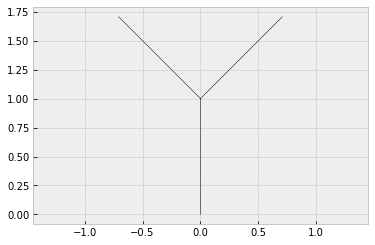

In [4]:
turn_amount = 45
plot_coords(branching_turtle_to_coords('F[-F]+F', turn_amount))

Now that we have plotted a basic branching pattern, we can use l_plot to iterate this pattern more times.

0:  F
1:  F[-F][+F]
2:  F[-F][+F][-F[-F][+F]][+F[-F][+F]]
3:  F[-F][+F][-F[-F][+F]][+F[-F][+F]][-F[-F][+F][-F[-F][+F]][+F[-F][+F]]][+F[-F][+F][-F[-F][+F]][+F[-F][+F]]]
4:  F[-F][+F][-F[-F][+F]][+F[-F][+F]][-F[-F][+F][-F[-F][+F]][+F[-F][+F]]][+F[-F][+F][-F[-F][+F]][+F[-F][+F]]][-F[-F][+F][-F[-F][+F]][+F[-F][+F]][-F[-F][+F][-F[-F][+F]][+F[-F][+F]]][+F[-F][+F][-F[-F][+F]][+F[-F][+F]]]][+F[-F][+F][-F[-F][+F]][+F[-F][+F]][-F[-F][+F][-F[-F][+F]][+F[-F][+F]]][+F[-F][+F][-F[-F][+F]][+F[-F][+F]]]]


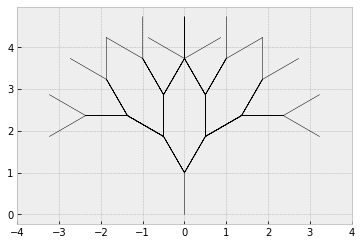

In [7]:
n = 4 # iterations
angle = 30 # turning angle
l_plot('F', {'F': 'F[-F][+F]'}, n, angle)
for i in range(5):
    print('{}: '.format(i),
          transform_multiple('F', {'F': 'F[-F][+F]'}, i))

Now we can do something a little more asymmetric!

0:  F
1:  FF[++F][-FF]
2:  FF[++F][-FF]FF[++F][-FF][++FF[++F][-FF]][-FF[++F][-FF]FF[++F][-FF]]
3:  FF[++F][-FF]FF[++F][-FF][++FF[++F][-FF]][-FF[++F][-FF]FF[++F][-FF]]FF[++F][-FF]FF[++F][-FF][++FF[++F][-FF]][-FF[++F][-FF]FF[++F][-FF]][++FF[++F][-FF]FF[++F][-FF][++FF[++F][-FF]][-FF[++F][-FF]FF[++F][-FF]]][-FF[++F][-FF]FF[++F][-FF][++FF[++F][-FF]][-FF[++F][-FF]FF[++F][-FF]]FF[++F][-FF]FF[++F][-FF][++FF[++F][-FF]][-FF[++F][-FF]FF[++F][-FF]]]
4:  FF[++F][-FF]FF[++F][-FF][++FF[++F][-FF]][-FF[++F][-FF]FF[++F][-FF]]FF[++F][-FF]FF[++F][-FF][++FF[++F][-FF]][-FF[++F][-FF]FF[++F][-FF]][++FF[++F][-FF]FF[++F][-FF][++FF[++F][-FF]][-FF[++F][-FF]FF[++F][-FF]]][-FF[++F][-FF]FF[++F][-FF][++FF[++F][-FF]][-FF[++F][-FF]FF[++F][-FF]]FF[++F][-FF]FF[++F][-FF][++FF[++F][-FF]][-FF[++F][-FF]FF[++F][-FF]]]FF[++F][-FF]FF[++F][-FF][++FF[++F][-FF]][-FF[++F][-FF]FF[++F][-FF]]FF[++F][-FF]FF[++F][-FF][++FF[++F][-FF]][-FF[++F][-FF]FF[++F][-FF]][++FF[++F][-FF]FF[++F][-FF][++FF[++F][-FF]][-FF[++F][-FF]FF[++F][-FF]]][-FF[++

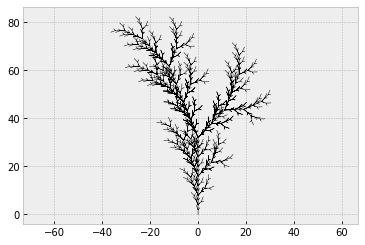

In [6]:
n = 5
angle = 22
l_plot('F', {'F': 'FF[++F][-FF]'}, n, angle)
for i in range(5):
    print('{}: '.format(i),
          transform_multiple('F', {'F': 'FF[++F][-FF]'}, i))

Now we can try using a transformation rule like `F -> FF` to make the lines closer to the root appear longer.

In [7]:
# Show the rule without F -> FF transformation.
for i in range(5):
    print('{}: '.format(i),
          transform_multiple('A', {'A': 'F+A'}, i))

0:  A
1:  F+A
2:  F+F+A
3:  F+F+F+A
4:  F+F+F+F+A


In [8]:
# Now show the rule with the F -> FF transformation.
for i in range(5):
    print('{}: '.format(i),
          transform_multiple('A', {'A': 'F+A', 'F': 'FF'}, i))

0:  A
1:  F+A
2:  FF+F+A
3:  FFFF+FF+F+A
4:  FFFFFFFF+FFFF+FF+F+A


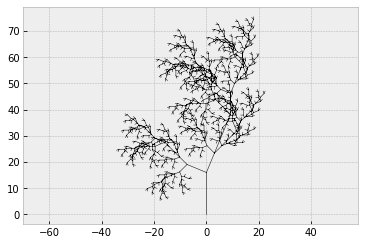

In [9]:
l_plot('A', {'F': 'FF', 'A': 'F[+AF-[A]--A][---A]'}, 5, 22.5)

## More plants
Now we generate some more plants of our own!

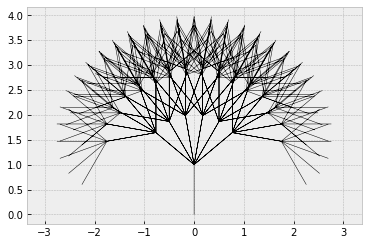

In [10]:
n = 3 # iterations
angle = 10 # turning angle
l_plot('F', {'F': 'F[-F][+F][+++F][---F][+++++F][-----F]'}, n, angle)

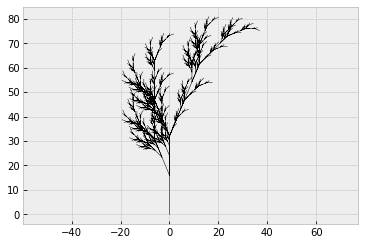

In [11]:
l_plot('A', {'A': 'F-[[A]+A]+F[+FA]-A', 'F': 'FF'}, 5, 22.5)

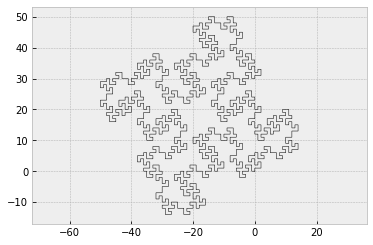

In [18]:
# Koch Curve
l_plot('F-F-F-F', {'F': 'F+FF-FF-F-F+F+FF-F-F+F+FF+FF-F'}, 2, 90)

0:  FA
1:  F+H-H+A
2:  F+H-H++H-H+A
3:  F+H-H++H-H++H-H+A
4:  F+H-H++H-H++H-H++H-H+A


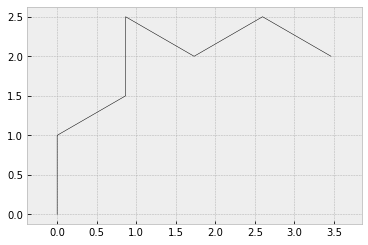

In [22]:
l_plot('FA', {'A': '+H-H+A'}, 2, 60)
for i in range(5):
    print('{}: '.format(i),
          transform_multiple('FA', {'A': '+H-H+A'}, i))

## Adding parameters
Source: https://www.houdinikitchen.net/2019/12/21/how-to-create-l-systems/
We replace variables in our rules with parameters from "The Algorithmic Beauty of Plants".
* b = contraction ratio trunk
* e = contraction ratio branches
* c = branching angle trunk
* d = branching angle lateral axes
* h = width decrease rate
* i = divergence angle
